Import python libraries:

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

Define function to pull ticker price history:

In [20]:
def get_ticker_history(ticker):

    stock = yf.Ticker(ticker)
    stock.info
    history = stock.history(period="1mo")

    df = pd.DataFrame(history)
    df.reset_index(inplace=True)
    
    #drop unwanted columns
    df.drop(['High','Low','Dividends','Stock Splits'], axis=1, inplace=True)

    #rename columns
    df.rename(columns={'Open': 'open_price', 'Close': 'close_price', 'Volume': 'volume'}, inplace=True)

    #clean up columns
    df['open_price'] = np.round(df['open_price'],2)
    df['close_price'] = np.round(df['close_price'],2)
    df['date'] = (df['Date']).dt.date

    #calculate new "price delta column"
    df['ticker'] = f'{ticker}'
    df['price_delta'] = df['close_price'] - df['open_price']

    #return desired columns
    df = df[['ticker', 'open_price', 'close_price', 'price_delta', 'volume', 'date']]

    return(df)

Print the first few rows of our dataframe:

In [25]:
ex_table = get_ticker_history("NVDA")
print(ex_table.head(5))

  ticker  open_price  close_price  price_delta    volume        date
0   NVDA      719.44       694.49       -24.95  70483300  2024-02-20
1   NVDA      680.03       674.69        -5.34  69029800  2024-02-21
2   NVDA      750.21       785.34        35.13  86510000  2024-02-22
3   NVDA      807.86       788.13       -19.73  82938800  2024-02-23
4   NVDA      796.96       790.88        -6.08  50397300  2024-02-26


Plot the data in our dataframe:

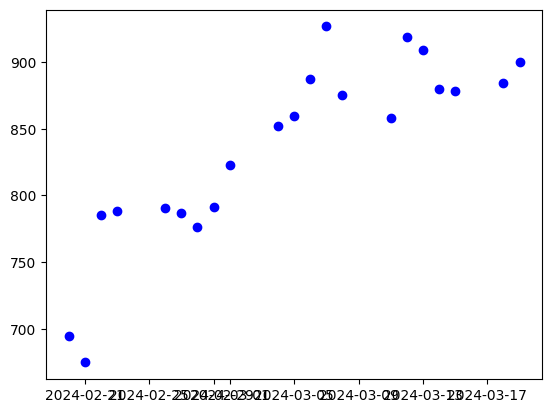

In [26]:
ex_plot = get_ticker_history("NVDA")
plt.scatter(ex_plot['date'], ex_plot['close_price'], label='Original Data', color='blue')
plt.show()

Create a new function to fit a curve based on the closing prices of our stock:

In [27]:

def approximate_curve(ticker):
    ticker_history = get_ticker_history(ticker)
    plt.scatter(ticker_history['date'], ticker_history['close_price'], label='Original Data', color='blue')

    plt.show()

    #ticker_history

In [28]:
#approximate_curve("NVDA")